<a href="https://colab.research.google.com/github/Ram-Pasupula/torch/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Torch Basic Neural Network Model

https://www.researchgate.net/figure/Deep-Neural-Network-architecture_fig1_330120030

In [26]:
#Import packages

import torch
import torch.nn as nn
import torch.nn.functional as F



In [27]:
#Create a model calss that inherits nn.module

#dataset -https://www.kaggle.com/datasets/uciml/iris
#https://archive.ics.uci.edu/dataset/53/iris
#0/p- class of iris plant: Iris Setosa, Iris Versicolour, or Iris Virginica
#sepal length	Feature
#sepal width	Feature
#petal length	Feature
#petal width	Feature
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_size1=8, hidden_size2=9, output_features=3):
        super().__init__()
        #input fully connected to first hidenlayer
        self.fc1 = nn.Linear(input_features, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_features)

    def forward(self, x):
        #relu- rectified linear unit <0 = 0
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x =self.fc3(x)
        return x

In [28]:
#Pick a manual seed for randomisation
torch.manual_seed(41)
#Create an instance of the model
model = Model()




In [29]:
#read dataset using pandas dataframe
import pandas as pd
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
# replace last column names with integer values

df['species'].replace(['setosa', 'versicolor', 'virginica'],
                        [0, 1, 2], inplace=True)
#df.head()
#df.tail()

In [31]:
#Extract features and output
y = df['species']
x= df.drop('species', axis=1)
x = x.values
y = y.values


In [32]:
#import sci-kit package
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test.shape)

(120, 4)
(30, 4)
[1 1 2 1 2 0 2 1 2 1 1 1 0 2 2 0 2 1 0 1 2 1 2 0 0 2 2 0 1 0 0 1 0 1 2 0 1
 1 2 0 1 1 0 2 1 0 2 2 0 1 0 0 2 2 2 0 0 0 0 0 2 2 0 2 1 0 0 2 2 2 1 1 2 0
 1 2 1 1 0 1 0 1 0 1 2 2 2 0 0 0 0 2 0 0 1 2 0 2 0 1 2 1 0 2 0 1 0 2 1 1 2
 1 1 2 2 0 1 1 1 2]
(30,)


In [33]:
#Covert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
#print(x_train)
#Covert y features to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [34]:
# Set the criterion of the model to measure the  error
criterion = nn.CrossEntropyLoss()
#Set the optimiser , learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)




In [35]:
#Train our model ,epchos= 100
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.2676880657672882
Epoch: 60 Loss: 0.17942363023757935
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118418931961
Epoch: 90 Loss: 0.06520850956439972


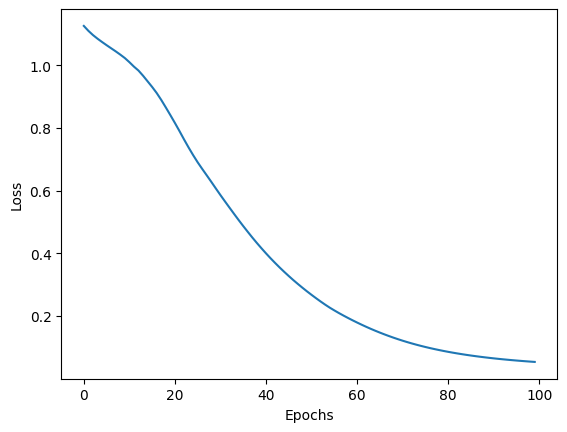

In [36]:
# graph
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()